In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import tensorflow_datasets as tfds

In [15]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()
# X_train, y_train = X_train/255.0, y_train/255.0

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy' 
)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
r = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2419 - accuracy: 0.7523 - val_loss: 0.5097 - val_accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5800 - accuracy: 0.8489 - val_loss: 0.3811 - val_accuracy: 0.9014
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4543 - accuracy: 0.8796 - val_loss: 0.3181 - val_accuracy: 0.9239
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4042 - accuracy: 0.8934 - val_loss: 0.3557 - val_accuracy: 0.9227
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3827 - accuracy: 0.8991 - val_loss: 0.3995 - val_accuracy: 0.9175
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3684 - accuracy: 0.9039 - val_loss: 0.2693 - val_accuracy: 0.9410
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3472 - accuracy: 0.9093 - val_loss: 0.3063 - val_accuracy:

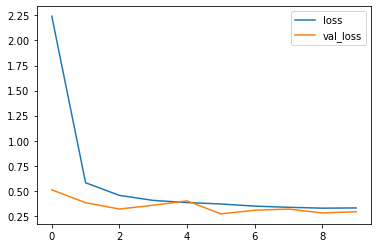

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

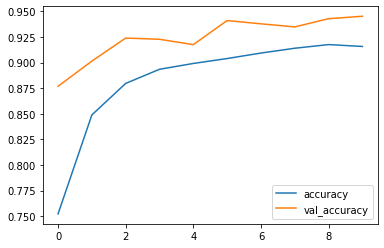

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.9452


[0.2908855974674225, 0.9452000260353088]

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion_Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("normalize the confusion matrix")
  else:
    print("without normalize the confusion matrix")
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

without normalize the confusion matrix
[[ 950    0    2    1    0    0   14    1   11    1]
 [   1 1110    2    5    0    2    1    1   11    2]
 [   2    0  974   11    2    1    3   12   26    1]
 [   1    0   12  954    0   24    0    4   10    5]
 [   1    1    3    2  902    0   18    2   10   43]
 [   4    0    1   15    2  835   21    2    5    7]
 [   3    2    1    0    3    4  938    0    6    1]
 [   4    4   20    6    3    0    1  980    6    4]
 [   4    2   10    5    4   18    7    1  913   10]
 [   1    5    2   17   14   22    2    8   42  896]]


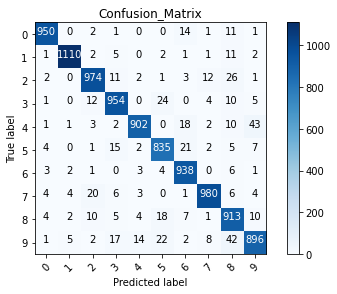

In [23]:
p_test=model.predict(X_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))